In [54]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
%matplotlib inline
import mapclassify as mc
import geoplot as gplt
import geoplot.crs as gcrs

### Join the county shp with county cases data

In [13]:
md = gpd.read_file("data/shp/Maryland_Counties.shp").astype({"county_fip": "str"})

In [18]:
cases = pd.read_csv("data/COVID-19/MDCOVID19_CasesByCounty.csv", header=0)

In [19]:
cases = cases.transpose().reset_index()
cases.columns = cases.iloc[0]
cases = cases.drop(cases.index[0])
cases = cases.rename(columns={"DATE": "county"}).fillna(0)

In [26]:
df = md[["county", "geometry"]].merge(cases.reset_index(), left_index=True, right_index=True, how="inner").drop(columns=["index", "county_y"]).rename(columns={"county_x": "county"})

In [29]:
for date in df.columns.to_list()[2:]:
    df = df.astype({date: "int"})

In [31]:
df.to_file("data/shp/MD_county_cases.shp")

### Vis

In [51]:
df = gpd.read_file("data/shp/MD_county_cases.shp")

In [52]:
dates = df.columns.to_list()[1:-1:14][:-1]
dates

['2020/03/15',
 '2020/03/29',
 '2020/04/12',
 '2020/04/26',
 '2020/05/10',
 '2020/05/24',
 '2020/06/07',
 '2020/06/21',
 '2020/07/05',
 '2020/07/19',
 '2020/08/02',
 '2020/08/16',
 '2020/08/30']

In [82]:
alldata = []
for date in dates:
    alldata += df[date].to_list()

alldatano0 = list(filter(lambda a: a!=0, alldata))

In [90]:
scheme = mc.UserDefined(alldata, [1] + list(mc.FisherJenks(alldatano0, k=9).bins))
scheme

UserDefined                 

      Interval         Count
----------------------------
[    0.00,     1.00] |    22
(    1.00,   659.00] |   168
(  659.00,  1878.00] |    55
( 1878.00,  3645.00] |    22
( 3645.00,  5955.00] |    10
( 5955.00,  8300.00] |    10
( 8300.00, 12175.00] |     6
(12175.00, 16434.00] |    10
(16434.00, 20589.00] |     6
(20589.00, 26151.00] |     3

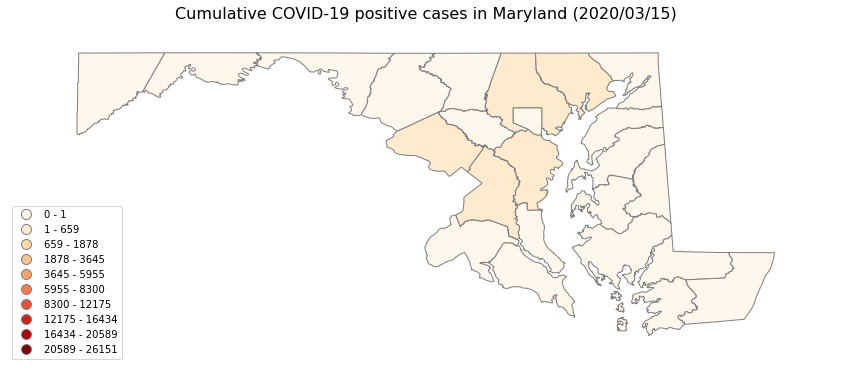

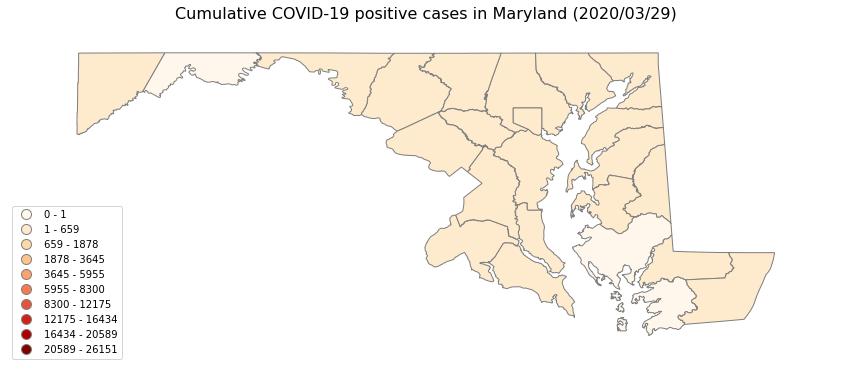

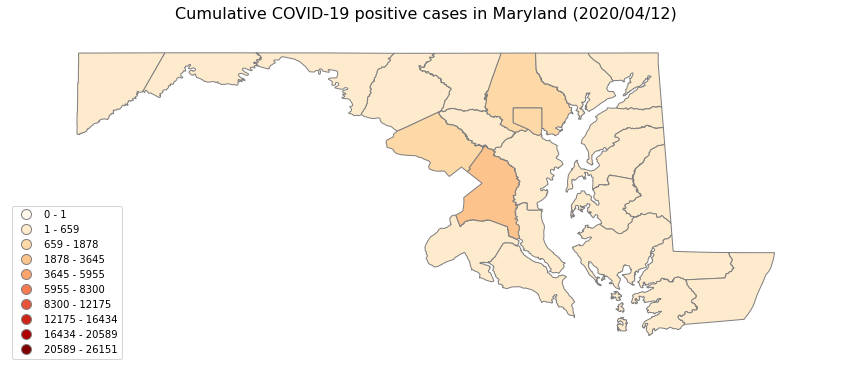

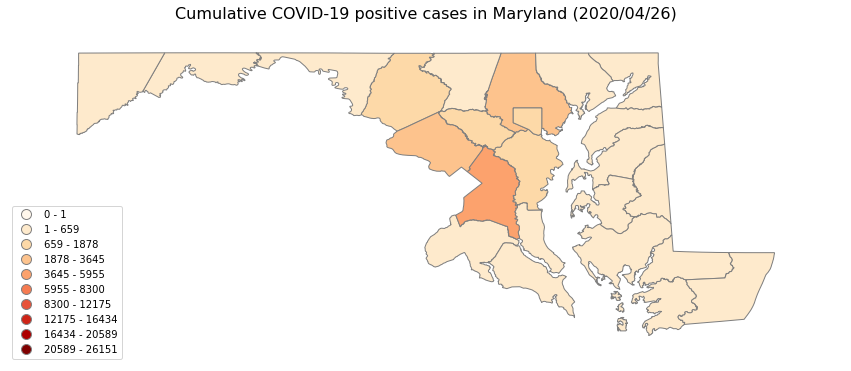

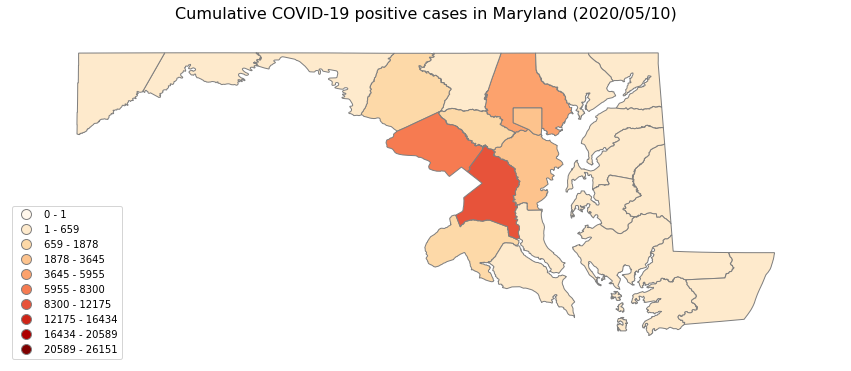

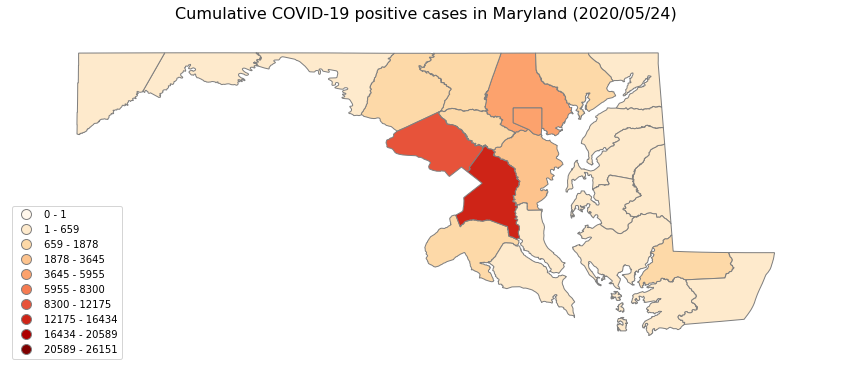

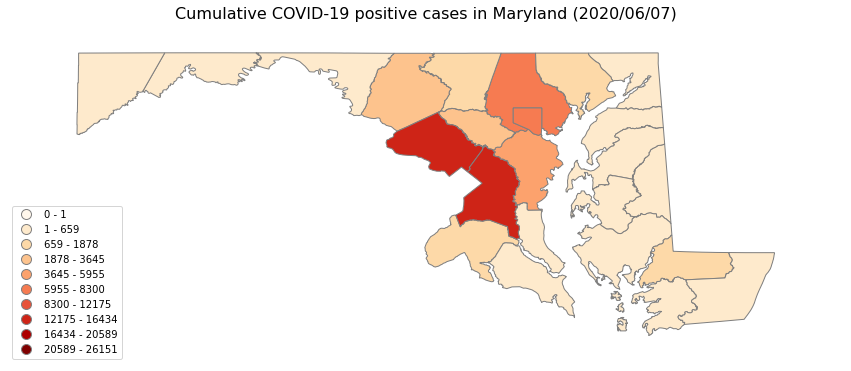

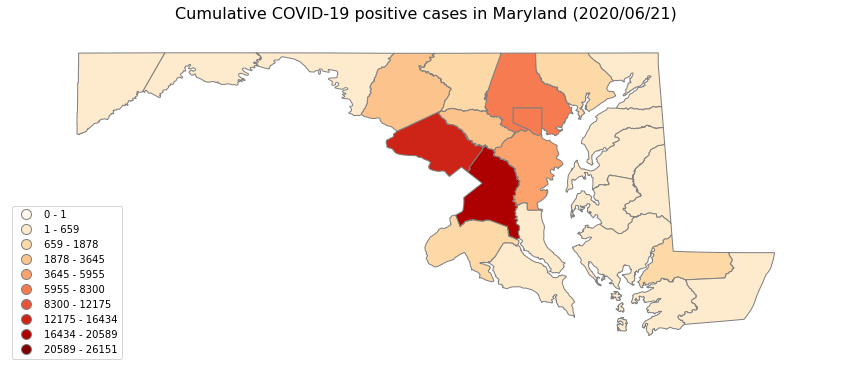

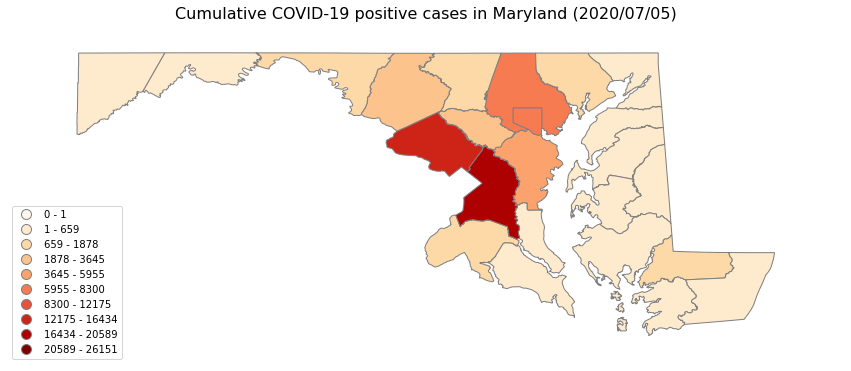

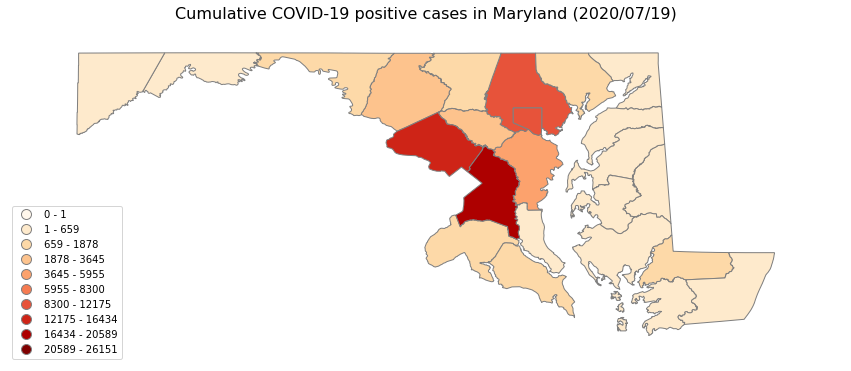

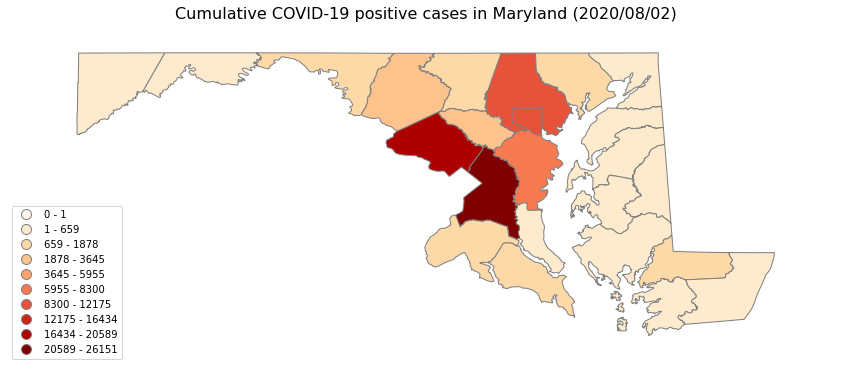

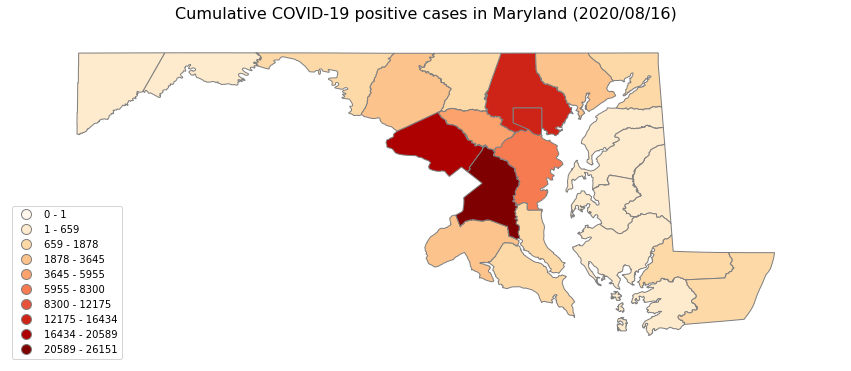

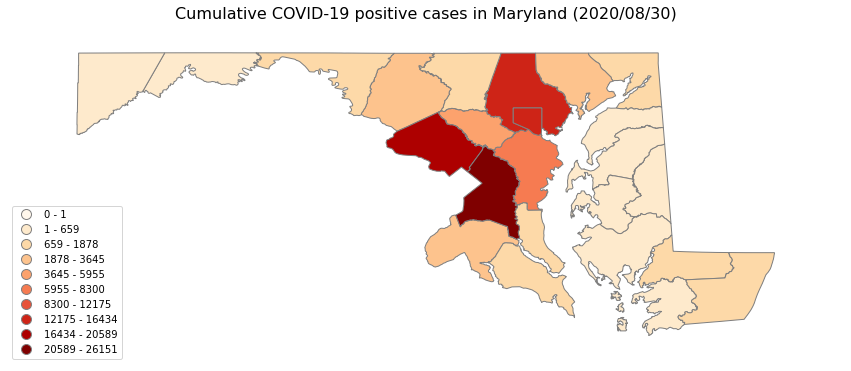

In [98]:
for date in dates:
    fig, ax = plt.subplots(figsize=(15, 10))
    
    gplt.choropleth(
        df,
        hue=date, scheme=scheme,
        cmap="OrRd", linewidth=1,
        edgecolor="grey",
        legend=True,
        legend_kwargs={"loc": "lower left"},
        ax=ax
    )

#     gplt.webmap(df, ax=ax)

    plt.title("Cumulative COVID-19 positive cases in Maryland (%s)" % date, fontsize=16)

    plt.show()
    
    fig.savefig("figs/county_cases/%s.png" % date.replace("/", "-"), dpi=220)